In [25]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

In [86]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [50]:
unique, counts = np.unique(y_test, return_counts=True)
print("test has", dict(zip(unique,counts))) # handwritten digits dataset

test has {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [51]:
unique, counts = np.unique(y_train, return_counts=True)
print("train has", dict(zip(unique, counts)))

train has {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [9]:
indices = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indices]
labels = y_train[indices]

In [21]:
from ast import increment_lineno
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(len(indices)):
  plt.subplot(5,5,i+1)
  image=images[i]

  plt.imshow(image, cmap='gray')
  plt.axis('off')
plt.savefig("mnist-samples.png")
plt.close("all")

In [24]:
images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [26]:
from tensorflow.keras.utils import to_categorical, plot_model

In [87]:
# converts y_train and y_test to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [73]:
to_categorical(y_test), y_test

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [30]:
X_train.shape

(60000, 28, 28)

In [74]:
X_train[1:].max()

255

In [88]:
image_size = X_train.shape[1]
INPUT_SIZE = image_size * image_size
X_train = np.reshape(X_train, [-1, INPUT_SIZE])
X_test = np.reshape(X_test, [-1, INPUT_SIZE])
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [76]:
X_train[1:].max()

1.0

In [77]:
BATCH_SIZE = 128
HIDDEN_UNITS = 256
DROPOUT = 0.45
INPUT_SIZE = image_size * image_size
NUM_LABELS = len(np.unique(y_train))

In [78]:
model=Sequential()

In [79]:
model.add(Dense(HIDDEN_UNITS, input_dim=INPUT_SIZE))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(HIDDEN_UNITS))))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NUM_LABELS))
model.add(Activation('softmax'

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 activation_15 (Activation)  (None, 256)               0         
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 activation_16 (Activation)  (None, 256)               0         
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 10)               

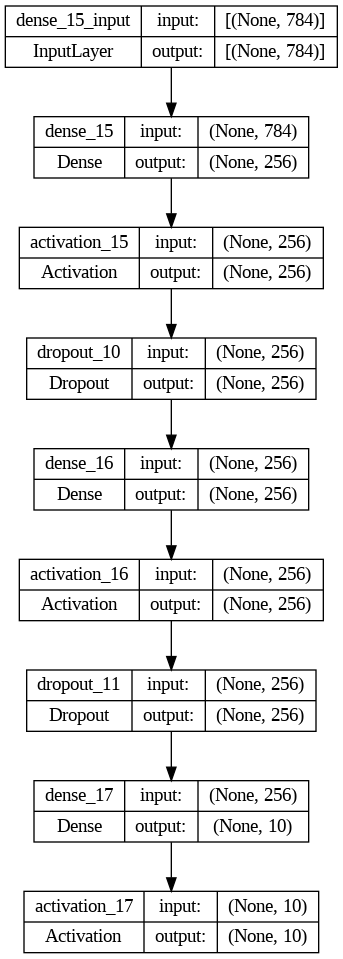

In [82]:
plot_model(model, to_file='mlp_mnist.png', show_shapes=True)

In [83]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
model.fit(X_train, y_train_one_hot, epochs=20, batch_size=BATCH_SIZE)

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.4282 - accuracy: 0.8680
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1933 - accuracy: 0.9417
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1503 - accuracy: 0.9542
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1283 - accuracy: 0.9620
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1130 - accuracy: 0.9656
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1037 - accuracy: 0.9684
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0955 - accuracy: 0.9704
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0888 - accuracy: 0.9723
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0827 - accuracy: 0.9740
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0760 - accuracy: 0.9

In [89]:
loss, acc = model.evaluate(X_test, y_test_one_hot, batch_size=BATCH_SIZE)

79/79 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9822


##Regularization

Reularization techniques can help prevent overfitting

In [90]:
from tensorflow.keras.regularizers import l2
model.add(Dense(HIDDEN_UNITS, kernel_regularizer=l2(0.001), input_dim=INPUT_SIZE))
model.add(Dense(NUM_LABELS))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 activation_15 (Activation)  (None, 256)               0         
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 activation_16 (Activation)  (None, 256)               0         
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 10)               

In [99]:
model=Sequential()
model.add(Dense(HIDDEN_UNITS,input_dim=INPUT_SIZE))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(HIDDEN_UNITS))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(HIDDEN_UNITS, kernel_regularizer=l2(0.001)))
#model.add(Dense(HIDDEN_UNITS, kernel_regularizer=l2(0.001), input_dim=INPUT_SIZE))
model.add(Dense(NUM_LABELS))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 256)               200960    
                                                                 
 activation_34 (Activation)  (None, 256)               0         
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_41 (Dense)            (None, 256)               65792     
                                                                 
 activation_35 (Activation)  (None, 256)               0         
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 256)             

In [100]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
model.fit(X_train, y_train_one_hot, epochs=20, batch_size=BATCH_SIZE)

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.5856 - accuracy: 0.8735
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2797 - accuracy: 0.9398
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2012 - accuracy: 0.9512
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1615 - accuracy: 0.9590
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1458 - accuracy: 0.9620
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1335 - accuracy: 0.9649
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1238 - accuracy: 0.9683
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1168 - accuracy: 0.9697
Epoch 9/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1135 - accuracy: 0.9699
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1068 - accura

In [102]:
loss, acc = model.evaluate(X_test, y_test_one_hot, batch_size=BATCH_SIZE)

79/79 [==============================] - 1s 6ms/step - loss: 0.0820 - accuracy: 0.9816


In [103]:
model=Sequential()
model.add(Dense(HIDDEN_UNITS, kernel_regularizer=l2(0.001), input_dim=INPUT_SIZE))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(HIDDEN_UNITS, kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(HIDDEN_UNITS, kernel_regularizer=l2(0.001)))
#model.add(Dense(HIDDEN_UNITS, kernel_regularizer=l2(0.001), input_dim=INPUT_SIZE))
model.add(Dense(NUM_LABELS))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               200960    
                                                                 
 activation_37 (Activation)  (None, 256)               0         
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               65792     
                                                                 
 activation_38 (Activation)  (None, 256)               0         
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 256)             

In [104]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
model.fit(X_train, y_train_one_hot, epochs=20, batch_size=BATCH_SIZE)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.9344 - accuracy: 0.8734
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4987 - accuracy: 0.9391
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3799 - accuracy: 0.9471
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3372 - accuracy: 0.9525
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3159 - accuracy: 0.9526
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3065 - accuracy: 0.9541
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3053 - accuracy: 0.9543
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2969 - accuracy: 0.9565
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2986 - accuracy: 0.9552
Epoch 10/20
469/469 [==============================] - 6s 14ms/step - loss: 0.2973 - accura

In [106]:
loss, acc = model.evaluate(X_test, y_test_one_hot, batch_size=BATCH_SIZE)

79/79 [==============================] - 1s 9ms/step - loss: 0.2341 - accuracy: 0.9717
